## Read Undersampled_data:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from zipfile import ZipFile
import nbimporter
import random_forest_method
import performance_measure
import svm_method
import data_sampling
import split_data_set

Importing Jupyter notebook from random_forest_method.ipynb
Importing Jupyter notebook from performance_measure.ipynb
Importing Jupyter notebook from svm_method.ipynb
Importing Jupyter notebook from data_sampling.ipynb
Importing Jupyter notebook from split_data_set.ipynb


In [2]:
path = "../../../undersampled_data.zip"

zip_file = ZipFile(path)
undersampled_data = pd.read_csv(zip_file.open('undersampled_data.csv')) #, nrows=500000)
#data = pd.read_csv(path, compression='zip', sep=',')#, nrows=500000)

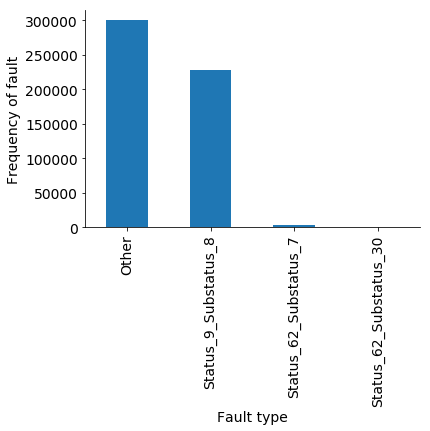

<Figure size 1440x1152 with 0 Axes>

In [3]:
data_sampling.plot_balance(undersampled_data, 'Status')

In [4]:
print(undersampled_data['Status'].value_counts())

Other                     300000
Status_9_Substatus_8      228668
Status_62_Substatus_7       4098
Status_62_Substatus_30       383
Name: Status, dtype: int64


## Do more undersampling

In [5]:
undersampled_data = data_sampling.undersample_dataset(undersampled_data,20000,"Other")
undersampled_data = data_sampling.undersample_dataset(undersampled_data,20000,"Status_9_Substatus_8")

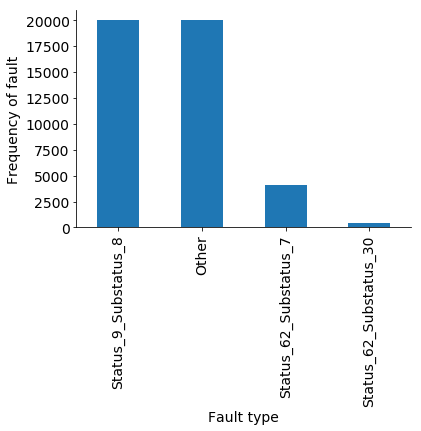

<Figure size 1440x1152 with 0 Axes>

In [6]:
data_sampling.plot_balance(undersampled_data, 'Status')

In [7]:
X = undersampled_data.drop(columns = ['Status', 'TimeStamp'])
y = undersampled_data.Status
y.shape

(44481,)

In [8]:
y.value_counts()

Status_9_Substatus_8      20000
Other                     20000
Status_62_Substatus_7      4098
Status_62_Substatus_30      383
Name: Status, dtype: int64

### Split into training and test

In [9]:
X_train, X_test, y_train, y_test = split_data_set.split_data(X,y)

In [10]:
y_train.value_counts()

Status_9_Substatus_8      13400
Other                     13400
Status_62_Substatus_7      2746
Status_62_Substatus_30      256
Name: Status, dtype: int64

In [11]:
y_test.value_counts()

Status_9_Substatus_8      6600
Other                     6600
Status_62_Substatus_7     1352
Status_62_Substatus_30     127
Name: Status, dtype: int64

## Random forest and feature importance

Normalized confusion matrix
[[9.85606061e-01 6.06060606e-04 3.78787879e-03 1.00000000e-02]
 [1.65354331e-01 8.34645669e-01 0.00000000e+00 0.00000000e+00]
 [5.17751479e-03 0.00000000e+00 9.94822485e-01 0.00000000e+00]
 [1.19696970e-02 0.00000000e+00 0.00000000e+00 9.88030303e-01]]


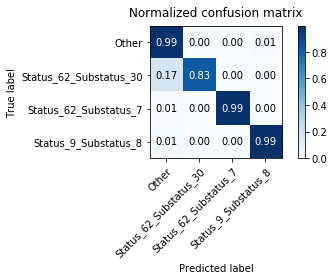

Total Accuracy 		0.986

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.984 		 0.986 		 0.985
Status_62_Substatus_30    	 0.964 		 0.835 		 0.895
Status_62_Substatus_7     	 0.982 		 0.995 		 0.988
Status_9_Substatus_8      	 0.990 		 0.988 		 0.989


In [12]:
rf = random_forest_method.get_rf_model(X_train, X_test, y_train, y_test)

In [13]:
rf

,importance
ActivePower,0.147348
Log-T-Raw-Rectifier1HeatSink,0.081679
Log-T-Raw-TransformerTemperature,0.072150
Log-T-Raw-Stator1Temperature,0.055497
Log-T-Raw-Rotor2Temperature,0.049225
Log-T-Raw-Rotor1Temperature,0.047149
Average blade angle across A B C,0.040502
Log-T-Raw-Stator2Temperature,0.040053
Log-T-Raw-NacelleAmbientTemperature,0.038132
Log-T-Raw-Rectifier2HeatSink,0.036340


# Preprocessing

### Scale dataset

In [14]:
from sklearn.preprocessing import MinMaxScaler

from sklearn import preprocessing

scaler  = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(29802, 34)
(14679, 34)


### SVM method

### BALANCED SVM

Loading...
Training...
Training Complete
Plotting Confusion Matrix...
Normalized confusion matrix
[[0.34848485 0.385      0.13121212 0.13530303]
 [0.14173228 0.73228346 0.07874016 0.04724409]
 [0.04068047 0.0066568  0.89423077 0.05843195]
 [0.09393939 0.25772727 0.01469697 0.63363636]]


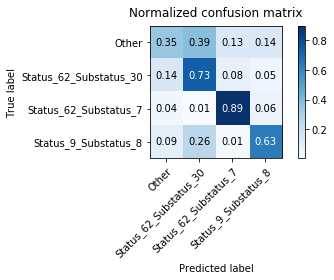

Plotting Performance Measure...
Total Accuracy 		0.530

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.768 		 0.348 		 0.480
Status_62_Substatus_30    	 0.021 		 0.732 		 0.042
Status_62_Substatus_7     	 0.554 		 0.894 		 0.684
Status_9_Substatus_8      	 0.810 		 0.634 		 0.711


SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=12, shrinking=True, tol=0.001,
    verbose=False)

In [15]:
# Balanced
svm_method.get_svm_model_balanced(X_train_scaled, X_test_scaled, y_train, y_test)

### UNBALANCED SVM

Loading...
Training...
Training Complete
Plotting Confusion Matrix...
Normalized confusion matrix
[[0.85227273 0.         0.00939394 0.13833333]
 [0.88976378 0.         0.         0.11023622]
 [0.50813609 0.         0.43343195 0.05843195]
 [0.33818182 0.         0.         0.66181818]]


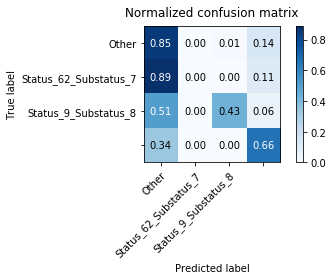

Plotting Performance Measure...
Total Accuracy 		0.721

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.650 		 0.852 		 0.737
Status_62_Substatus_7     	 0.904 		 0.433 		 0.586
Status_9_Substatus_8      	 0.813 		 0.662 		 0.730


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=12, shrinking=True, tol=0.001,
    verbose=False)

In [16]:
# Unbalanced
svm_method.get_svm_model(X_train_scaled, X_test_scaled, y_train, y_test)

### SMOTE (Synthetic Minority Oversampling Technique)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_train_scaled_smote ,y_train_smote = sm.fit_resample(X_train_scaled, y_train)


X_test_scaled_smote ,y_test_smote = sm.fit_resample(X_test_scaled, y_test)

In [30]:
y1 = pd.DataFrame(X_train_scaled_smote)
y1[0].value_counts()

Status_62_Substatus_7     13400
Status_9_Substatus_8      13400
Other                     13400
Status_62_Substatus_30    13400
Name: 0, dtype: int64

## SMOTE and unbalanced weights (Best results for 62_30)!

Loading...
Training...
Training Complete
Plotting Confusion Matrix...
Normalized confusion matrix
[[0.43712121 0.36454545 0.11030303 0.0880303 ]
 [0.15893939 0.75454545 0.07393939 0.01257576]
 [0.03545455 0.         0.90757576 0.0569697 ]
 [0.10727273 0.26045455 0.01363636 0.61863636]]


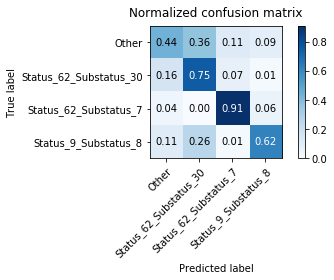

Plotting Performance Measure...
Total Accuracy 		0.679

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.592 		 0.437 		 0.503
Status_62_Substatus_30    	 0.547 		 0.755 		 0.634
Status_62_Substatus_7     	 0.821 		 0.908 		 0.862
Status_9_Substatus_8      	 0.797 		 0.619 		 0.697


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=12, shrinking=True, tol=0.001,
    verbose=False)

In [32]:
svm_method.get_svm_model(X_train_scaled_smote, X_test_scaled_smote, y_train_smote, y_test_smote)

## SMOTE and class_weight balanced

Loading...
Training...
Training Complete
Plotting Confusion Matrix...
Normalized confusion matrix
[[0.34848485 0.385      0.13121212 0.13530303]
 [0.14173228 0.73228346 0.07874016 0.04724409]
 [0.04068047 0.0066568  0.89423077 0.05843195]
 [0.09393939 0.25772727 0.01469697 0.63363636]]


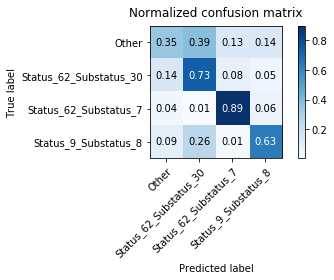

Plotting Performance Measure...
Total Accuracy 		0.530

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.768 		 0.348 		 0.480
Status_62_Substatus_30    	 0.021 		 0.732 		 0.042
Status_62_Substatus_7     	 0.554 		 0.894 		 0.684
Status_9_Substatus_8      	 0.810 		 0.634 		 0.711


SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=12, shrinking=True, tol=0.001,
    verbose=False)

In [33]:
# balanced with smote and undersampling
svm_method.get_svm_model_balanced(X_train_scaled, X_test_scaled, y_train, y_test)